In [8]:
import pandas as pd
import numpy as np
from math import sqrt
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pickle

In [9]:
con = sqlite3.connect("./movies2.db")

In [10]:
features = pd.read_sql("SELECT * FROM features", con, index_col=None)
features

,index,id,title,open,nation,grade,genre,director,actors,accum_audience,accum_play,score
0,0,00000,국제시장,2014-12-17,4,0,6,14262766,269,6088876,121217,8.76
1,1,00001,테이큰 3,2015-01-01,1,1,14,1637857,31,731242,20920,8.90
2,2,00002,마다가스카의 펭귄,2014-12-31,1,3,13,1508982,175,690824,16250,9.63
3,3,00003,"님아, 그 강을 건너지 마오",2014-11-27,4,3,5,2406234,37,353376,14924,9.80
4,4,00004,언브로큰,2015-01-07,1,1,14,131354,17,256475,10780,9.66
5,5,00005,패딩턴,2015-01-07,1,3,17,327009,8,302759,9727,9.52
6,6,00006,기술자들,2014-12-24,4,1,10,30116,170,227879,8068,8.84
7,7,00007,워킹걸,2015-01-07,4,4,17,1107548,117,147328,7067,3.93
8,8,00008,호빗: 다섯 군대 전투,2014-12-17,1,0,15,2646170,154,81669,2597,9.61
9,9,00009,타임 패러독스,2015-01-07,1,1,0,110064,16,76717,4328,8.44


In [26]:
start_date = '2015-01-07'
end_date = '2018-06-30'
features_20150101_20180630 = features[features['accum_audience'] >= 50000]
# features_20150101_20180630 = features_20150101_20180630[features['accum_audience'] <= 5000000]
features_20150101_20180630 = features_20150101_20180630[features['open'] >= start_date]
features_20150101_20180630 = features_20150101_20180630[features['open'] <= end_date]
features_20150101_20180630

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,index,id,title,open,nation,grade,genre,director,actors,accum_audience,accum_play,score
4,4,00004,언브로큰,2015-01-07,1,1,14,131354,17,256475,10780,9.66
5,5,00005,패딩턴,2015-01-07,1,3,17,327009,8,302759,9727,9.52
7,7,00007,워킹걸,2015-01-07,4,4,17,1107548,117,147328,7067,3.93
9,9,00009,타임 패러독스,2015-01-07,1,1,0,110064,16,76717,4328,8.44
11,11,00011,아메리칸 셰프,2015-01-07,1,1,17,982824,256,152728,4892,9.20
17,17,00017,오늘의 연애,2015-01-14,4,1,7,2333267,44,1891993,47234,9.28
18,18,00018,허삼관,2015-01-14,4,0,6,613129,212,955889,27658,9.00
20,20,00022,박물관이 살아있다 : 비밀의 무덤,2015-01-14,1,3,15,2217928,83,1101678,30146,9.40
22,22,00031,더 이퀄라이저,2015-01-28,1,4,14,368293,16,82779,4861,8.21
24,24,00033,강남 1970,2015-01-21,4,4,14,2517954,78,2192276,53302,9.32


In [27]:
from datetime import datetime,timedelta
from pandas import Series, DataFrame
def convert(s):
    return datetime.strptime(s, '%Y-%m-%d').date()
 

In [30]:
cnt = 0

data_ = []
for rows in features_20150101_20180630.iterrows():
    tmp = pd.read_sql("SELECT * FROM "+ "'" +rows[1][1]+ "'", con, index_col=None)
    tmp.drop_duplicates(['date'], inplace=True)
    
    now = convert(rows[1][3])
#     if now.weekday() is not 2:
#         continue
            
    L=[]
    L=pd.date_range(start = now - timedelta(days=22),end= now + timedelta(days=40))
    df = pd.DataFrame(index=range(63))
    df[:]="0"
    df['date']=L.strftime("%Y-%m-%d")
    df.set_index(df['date'], inplace=True)


    tmp.set_index(tmp['date'], inplace=True)
    tmp=tmp[tmp['date']<=(convert(rows[1][3])+ timedelta(days=40)).strftime("%Y-%m-%d")]
#     tmp=tmp[tmp['date']>=(convert(rows[1][3])- timedelta(days=22)).strftime("%Y-%m-%d")]
    tmp=tmp[tmp['date']>=(convert(rows[1][3])- timedelta(days=22)).strftime("%Y-%m-%d")]


    df_merged = pd.merge(df,tmp, how="outer")
    df_merged.isnull()
    # df_merged

    df_merged[df_merged.isnull()] = 0

#     df_merged['play'] = np.array(pd.to_numeric(df_merged['play'].str.replace(',',''), errors='coerce', downcast='float').tolist()).reshape(-1,1)
    df_merged['audience'] = pd.to_numeric(df_merged['audience'].str.replace(',',''), errors='coerce', downcast='float')
    df_merged['play'] = pd.to_numeric(df_merged['play'].str.replace(',',''), errors='coerce', downcast='float')
#     df_merged['director'] = rows[1][7]
    df_merged=df_merged.fillna(0) # nan값 0으로

#     a_tmp = np.concatenate((df_merged['audience'],[0],df_merged['play'],[0],df_merged['director'],[0])).reshape((3,-1)).T
    a_tmp = np.concatenate((df_merged['audience'],df_merged['play'])).reshape((2,-1)).T

    
#     if len(a_tmp) is not 64:
#         print(tmp)
#         print(df_merged)
#         print(a_tmp)
#         break;
    
    data_.append(a_tmp)
#     dataY_.append([float(rows[1][9])])

#     cnt += 1
#     if cnt>0:
#         break

C:\Users\Administrator\PycharmProjects\stock\env\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [43]:
data = np.array(data_)
data.shape

(619, 63, 2)

## append D-day

In [15]:
dday = [i for i in range(-22, 41)]

d_data = []

for d_ in data:
    d_data.append(np.column_stack((d_, dday)))

d_data = np.array(d_data)
np.shape(d_data)

(295, 63, 3)

In [16]:
np.save('./npy/data_origin.npy', d_data)

## for Basic_RNN

### split

In [20]:
dataX = []
dataY = []

size = 40
input_length = 23

for s in [range(0,23)]:
    start = s

    window = slice(start, start+size)
    data_window = data[:,window,:]

    dataX.append(data_window[:,:input_length,:])
    dataY.append(data_window[:,input_length:,0:1])

dataX = np.array(dataX)
dataY = np.array(dataY)

dataX = dataX.reshape((-1,23,3))
dataY = dataY.reshape((-1,17,1)).sum(axis=1)

dataX.shape, dataY.shape

TypeError: unsupported operand type(s) for +: 'range' and 'int'

In [18]:
size = 40
input_length = 23

# for 물괴
start = 1
window = slice(start, start+size)
data_window = data[:,window,:]

dataX_2 = data_window[:,:input_length,:]
dataY_2 = data_window[:,input_length:,0:1].sum(axis=1)


# # for 너의결혼식, 나를차버린스파이
start = 23
window = slice(start, start+size)
data_window = data[:,window,:]

dataX_23 = data_window[:,:input_length,:]
dataY_23 = data_window[:,input_length:,0:1].sum(axis=1)


# dataX = np.array(dataX)
# dataY = np.array(dataY)

# dataX = dataX.reshape((-1,23,3))
# dataY = dataY.reshape((-1,17,1)).sum(axis=1)

dataX_2.shape, dataY_2.shape

((295, 23, 2), (295, 1))

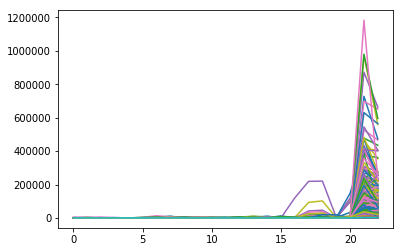

In [19]:
for d_ in dataX_2:
    plt.plot(d_[:])

### scaling

In [88]:
scalerY_2 = MinMaxScaler(feature_range=(0,1))
scalerY_2 = scalerY_2.fit(dataY_2)
norm_dataY_2 = scalerY_2.transform(dataY_2)

pickle.dump(scalerY_2, open('./scaler/scalerY_2.sav', 'wb'))


scalerX_2 = MinMaxScaler(feature_range=(0,1))
scalerX_2 = scalerX_2.fit(dataX_2.reshape(-1,3))
pickle.dump(scalerX_2, open('./scaler/scalerX_2.sav', 'wb'))
norm_dataX_2 = []
for i in dataX_2:
    norm_dataX_2.append(scalerX_2.transform(i))
norm_dataX_2 = np.array(norm_dataX_2)

norm_dataX_2.shape, norm_dataY_2.shape

((270, 23, 3), (270, 1))

In [89]:
np.save('./npy/basic_rnn/dataX_2.npy', norm_dataX_2)
np.save('./npy/basic_rnn/dataY_2.npy', norm_dataY_2)

In [63]:
scalerY_23 = MinMaxScaler(feature_range=(0,1))
scalerY_23 = scalerY_23.fit(dataY_23)
norm_dataY_23 = scalerY_23.transform(dataY_23)

pickle.dump(scalerY_23, open('./scaler/scalerY_23.sav', 'wb'))



scalerX_23 = MinMaxScaler(feature_range=(0,1))
scalerX_23 = scaler.fit(dataX_23.reshape(-1,3))
pickle.dump(scalerX_23, open('./scaler/scalerX_23.sav', 'wb'))
norm_dataX_23 = []
for i in dataX_23:
    norm_dataX_23.append(scalerX_23.transform(i))
norm_dataX_23 = np.array(norm_dataX_23)

norm_dataX_23.shape, norm_dataY_23.shape

array([[4.19816916e-02, 1.71021107e-01, 0.00000000e+00],
       [4.64093951e-02, 1.70222476e-01, 4.54545455e-02],
       [9.33288664e-02, 1.60981175e-01, 9.09090909e-02],
       [8.32993786e-02, 1.52424415e-01, 1.36363636e-01],
       [2.78112295e-02, 1.51055334e-01, 1.81818182e-01],
       [2.68212590e-02, 1.49001711e-01, 2.27272727e-01],
       [3.61580693e-03, 1.80262407e-02, 2.72727273e-01],
       [2.94425681e-03, 1.54021677e-02, 3.18181818e-01],
       [3.53582456e-03, 1.56303480e-02, 3.63636364e-01],
       [5.29241858e-03, 1.20935539e-02, 4.09090909e-01],
       [4.67368701e-03, 1.15231033e-02, 4.54545455e-01],
       [2.07954172e-03, 1.34626355e-02, 5.00000000e-01],
       [2.26063388e-03, 1.30062750e-02, 5.45454545e-01],
       [2.05237789e-04, 1.02681118e-03, 5.90909091e-01],
       [1.16200807e-04, 5.70450656e-04, 6.36363636e-01],
       [1.34310024e-04, 4.56360525e-04, 6.81818182e-01],
       [1.69019356e-04, 4.56360525e-04, 7.27272727e-01],
       [1.90146775e-04, 4.56360

In [62]:
np.save('./npy/basic_rnn/dataX_23.npy', norm_dataX_23)
np.save('./npy/basic_rnn/dataY_23.npy', norm_dataY_23)

### shuffle

In [ ]:
idx = [i for i in range(23000)]
np.random.shuffle(idx)

shuffled_dataX = []
shuffled_dataY = []

for i in idx:
    shuffled_dataX.append(norm_dataX[i])
    shuffled_dataY.append(norm_dataY[i])
    
shuffled_dataX = np.array(shuffled_dataX)
shuffled_dataY = np.array(shuffled_dataY)

shuffled_dataX.shape, shuffled_dataY.shape

In [20]:
np.save('./npy/basic_rnn/shuffled_dataX.npy', shuffled_dataX)
np.save('./npy/basic_rnn/shuffled_dataY.npy', shuffled_dataY)

((23000, 23, 3), (23000, 1))

## sampling

In [32]:
data = np.load('./npy/sampled_data.npy')
data.shape, data.max()

((1000, 63, 3), 662646.0)

## for seq2seq

In [47]:
data = np.array(data_)
data.shape

(619, 63, 2)

### scaling

In [49]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(data.reshape(-1,2)[:,0:1])
pickle.dump(scaler, open('./scaler/scaler_target_seq.sav', 'wb'))

scaler = scaler.fit(data.reshape(-1,2))
pickle.dump(scaler, open('./scaler/scaler_input_seq.sav', 'wb'))
norm_data = []
for i in data:
    norm_data.append(scaler.transform(i))
norm_data = np.array(norm_data)
norm_data.shape

(619, 63, 2)

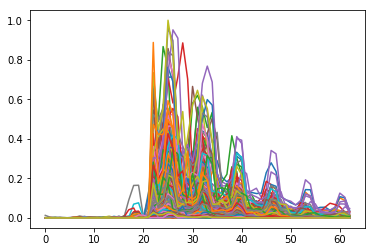

In [54]:
for d_ in norm_data:
    plt.plot(d_[:,0])
    
plt.savefig('./ppp.png')

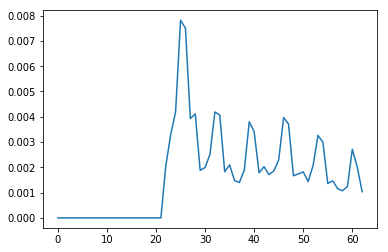

In [66]:
plt.plot(norm_data[4,:,0])
    
plt.savefig('./ppp.png')

### split

In [71]:
encoder_input = []
decoder_target = []

size = 40
input_length = 23

for s in range(0,23):
    start = s

    window = slice(start, start+size)
    data_window = norm_data[:,window,:]

    encoder_input.append(data_window[:,:input_length,:])
    decoder_target.append(data_window[:,input_length:,0:1])

encoder_input = np.array(encoder_input)
decoder_target = np.array(decoder_target)

encoder_input = encoder_input.reshape((-1,23,3))
decoder_target = decoder_target.reshape((-1,17,1))

encoder_input.shape, decoder_target.shape

((23000, 23, 3), (23000, 17, 1))

In [72]:
np.save('./npy/seq2seq/encoder_input.npy', encoder_input)
np.save('./npy/seq2seq/decoder_target.npy', decoder_target)

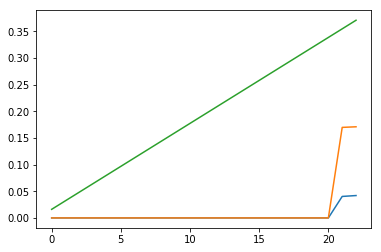

In [70]:
plt.plot(encoder_input[1000])

### shuffle

In [56]:
idx = [i for i in range(23000)]
np.random.shuffle(idx)

shuffled_encoder_input = []
shuffled_decoder_target = []

for i in idx:
    shuffled_encoder_input.append(encoder_input[i])
    shuffled_decoder_target.append(decoder_target[i])
    
shuffled_encoder_input = np.array(shuffled_encoder_input)
shuffled_decoder_target = np.array(shuffled_decoder_target)

shuffled_encoder_input.shape, shuffled_decoder_target.shape

((23000, 23, 3), (23000, 17, 1))

In [57]:
np.save('./npy/seq2seq/shuffled_encoder_input.npy', shuffled_encoder_input)
np.save('./npy/seq2seq/shuffled_decoder_target.npy', shuffled_decoder_target)